# RNA SECONDARY PREDICTION USING QUANTUM-INSPIRE GENETIC ALGORITHM
## Author : Pudit Boonnumsathien
## Advisor : Prof.Dr. Prabhas Chongstitvatana, Dr. Duangdao Wichadakul

ใช้ libraly qiskit ในการจำลอง qbit

In [1]:
import math
import numpy as np
import random
# %matplotlib inline
import matplotlib
matplotlib.use( 'tkagg' )
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib notebook
import sys
import pickle
import copy

from qiskit import IBMQ
from qiskit import QuantumCircuit, execute, Aer

from qiskit.providers.aer.noise import NoiseModel
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

import webbrowser

ใช้ Aer's qasm_simulator

In [2]:
# simulator = Aer.get_backend('qasm_simulator')

# Choose a real device to simulate
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
device = provider.get_backend('ibmq_16_melbourne')
coupling_map = device.configuration().coupling_map

# Generate an Aer noise model for device
noise_model = NoiseModel.from_backend(device)
basis_gates = noise_model.basis_gates

# Perform noisy simulation
backend = Aer.get_backend('qasm_simulator')

# ALGORITHM PARAMETERS
N = ขนาดของประชากร<br>
Genome = ความยาวจีโนม<br>
generation_max = จำนวนรุ่นประชากร<br>

In [3]:
N = 10  # Define here the population size
generation_max = 10000  # Define here the maximum number of generations/iterations

Genome = 0
stem_pool = []

# VARIABLES ALGORITHM     

In [4]:
popSize = N
genomeLength = Genome + 1

top_bottom = 2 #มิติเวคเตอร์
QuBitZero = np.array([[1], [0]])
QuBitOne = np.array([[0], [1]])

## RNA DECODER
### เข้ารหัส RNA
เข้ารหัส RNA ให้เป็น helix ที่เป็นไปได้โดยใช้ dynamic programming

In [5]:
# rna = "UACACUGUGGAUCCGGUGAGGUAGUAGGUUGUAUAGUUUGGAAUAUUACCACCGGUGAACUAUGCAAUUUUCUACCUUACCGGAGACAGAACUCUUCGA"
# rna = "CCCAGUGUUCAGACUACCUGUUCAGGAAGUAGUGGUUGUACAGUAGUCUGCACAUUGGUU"
# rna = "UGCCUACUGAGCUGAUAACAGUUAGAUGUUAACAAGCACUGGCUCAGUUCAGCAGGAAC"
# rna = "GGGAAAUCC"
# rna = "CGGGGGAAGUCCG"
rna = "CAGUGGAAGGACGGGUCCGGCGUGGAAACACGCCGUUGAGUAGAGUGUGAGCCACUG"

In [6]:
rna_metrix = None
def decoder(rna):
    global stem_pool, Genome, genomeLength, rna_metrix
    ACCEPT_HELIX_LENGTH = 2
    rna_metrix = np.zeros((len(rna),len(rna)),dtype=int)
    for i in range(len(rna)):
        for j in range(i+1, len(rna)):
            if ((rna[i] == "G" and rna[j] == "C") or 
            (rna[i] == "C" and rna[j] == "G") or 
            (rna[i] == "A" and rna[j] == "U") or 
            (rna[i] == "U" and rna[j] == "A") or
            (rna[i] == "G" and rna[j] == "U") or 
            (rna[i] == "U" and rna[j] == "G")):
                rna_metrix[i, j] = 1
    for j in range(1, len(rna)):
        i = 0
        match = False
        while j-i > 0:
            if rna_metrix[i, j] == 1 and not match:
                start_helix = i
                end_helix = j
                helix_length = 1
                match = True
            elif rna_metrix[i, j] == 1 and match:
                helix_length += 1
            elif rna_metrix[i, j] == 0 and match:
                if end_helix-start_helix-(2*helix_length)+1 < 3: #Fixed loop with less than 2 base
                    helix_length = helix_length-(3-(end_helix-start_helix-(2*helix_length)+1))
                if helix_length >= ACCEPT_HELIX_LENGTH:
                    stem_pool.append((start_helix, end_helix, helix_length))
                match = False
            i += 1
            j -= 1
        if match and end_helix-start_helix-(2*helix_length)+1 < 3: #Fixed loop with less than 2 base
            helix_length = helix_length-(3-(end_helix-start_helix-(2*helix_length)+1))
        if match and helix_length >= ACCEPT_HELIX_LENGTH:
            stem_pool.append((start_helix, end_helix, helix_length))
    for i in range(1, len(rna)-1):
        j = len(rna)-1
        match = False
        while j-i > 0:
            if rna_metrix[i, j] == 1 and not match:
                start_helix = i
                end_helix = j
                helix_length = 1
                match = True
            elif rna_metrix[i, j] == 1 and match:
                helix_length += 1
            elif rna_metrix[i, j] == 0 and match:
                if end_helix-start_helix-(2*helix_length)+1 < 3: #Fixed loop with less than 2 base
                    helix_length = helix_length-(3-(end_helix-start_helix-(2*helix_length)+1))
                if helix_length >= ACCEPT_HELIX_LENGTH:
                    stem_pool.append((start_helix, end_helix, helix_length))
                match = False
            i += 1
            j -= 1
        if match and end_helix-start_helix-(2*helix_length)+1 < 3: #Fixed loop with less than 2 base
            helix_length = helix_length-(3-(end_helix-start_helix-(2*helix_length)+1))
        if match and helix_length >= ACCEPT_HELIX_LENGTH:
            stem_pool.append((start_helix, end_helix, helix_length))
    print(rna_metrix)
    print(stem_pool)

    Genome = len(stem_pool) - 1
    genomeLength = Genome + 1
    return True

In [7]:
print(decoder(rna))

[[0 0 1 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 1 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
[(2, 11, 2), (3, 12, 2), (2, 15, 2), (4, 16, 2), (3, 18, 4), (2, 20, 2), (0, 23, 2), (2, 22, 3), (8, 16, 2), (8, 17, 3), (3, 23, 2), (2, 28, 2), (2, 30, 3), (10, 22, 3), (2, 32, 3), (11, 23, 2), (14, 22, 2), (0, 37, 6), (15, 24, 2), (3, 37, 3), (15, 25, 4), (5, 36, 2), (8, 33, 2), (2, 40, 2), (6, 36, 2), (11, 31, 2), (14, 28, 2), (7, 36, 2), (3, 41, 2), (8, 36, 2), (14, 30, 2), (9, 36, 5), (0, 46, 2), (13, 33, 3), (2, 45, 2), (0, 48, 2), (11, 37, 3), (17, 31, 2), (2, 47, 3), (13, 36, 3), (21, 28, 2), (10, 40, 2), (3, 48, 2), (17, 34, 7), (2, 51, 2), (15, 38, 2), (21, 32, 3), (14, 40, 2), (17, 37, 5), (10, 45, 2), (0, 56, 6), (21, 35, 4), (10, 47, 3), (20, 37, 2), (15, 43, 2), (3, 56, 3), (11, 48, 2), (14, 45, 2), (19, 40, 2), (22, 37, 3), (8, 52, 2), (24, 36, 2), (14, 47, 2), (21, 40, 2), (25, 36, 2), (7, 55, 2), (26, 36, 3), (8, 55, 2), (17, 46, 2), (22, 41, 2), (12,

### Memoisation for select helix
helix_overlap คือ helix ที่ไม่ชนกับ helix อื่น ใช้เป็นเงื่อนไขการเลือกก่อนเข้า find_lowest_energy() <br>
helix_overlap_cross คือ helix ที่ไม่สามารถมีอยู่พร้อมกันได้ในกรณีที่ไม่มีการตัด helix <br>
helix_cross คือ helix ที่ไม่สามารถมีอยู่พร้อมกันได้ในทุกกรณี

In [8]:
helix_overlap = np.zeros((genomeLength, genomeLength), dtype=int)
for i in range(genomeLength):
    set_i1 = set([e for e in range(stem_pool[i][0], stem_pool[i][0]+stem_pool[i][2])])
    set_i2 = set([e for e in range(stem_pool[i][1], stem_pool[i][1]-stem_pool[i][2], -1)])
    set_i3 = set([e for e in range(stem_pool[i][0], stem_pool[i][1]+1)])
    for j in range(genomeLength):
        set_j1 = set([e for e in range(stem_pool[j][0], stem_pool[j][0]+stem_pool[j][2])])
        set_j2 = set([e for e in range(stem_pool[j][1], stem_pool[j][1]-stem_pool[j][2], -1)])
        set_j3 = set([e for e in range(stem_pool[j][0], stem_pool[j][1]+1)])
        if set_i1.intersection(set_j1) == set() and set_i1.intersection(set_j2) == set() and\
        set_i2.intersection(set_j1) == set() and set_i2.intersection(set_j2) == set() and\
        (set_i3.intersection(set_j3) == set() or set_i3.intersection(set_j3) == set_i3 or set_i3.intersection(set_j3) == set_j3):
            helix_overlap[i, j] = 0
        else:
            helix_overlap[i, j] = 1
            
helix_overlap_cross = np.zeros((genomeLength, genomeLength), dtype=int)
for i in range(genomeLength):
    set_i3 = set([e for e in range(stem_pool[i][0], stem_pool[i][1]+1)])
    for j in range(genomeLength):
        set_j3 = set([e for e in range(stem_pool[j][0], stem_pool[j][1]+1)])
        if (set_i3.intersection(set_j3) == set()) or\
        (stem_pool[j][0]-stem_pool[i][0]<-1 and stem_pool[j][1]-stem_pool[i][1]>1) or\
        (stem_pool[j][0]+stem_pool[j][2]-(stem_pool[i][0]+stem_pool[i][2])>1 and stem_pool[j][1]-stem_pool[j][2]-(stem_pool[i][1]-stem_pool[i][2])<-1):
            helix_overlap_cross[i, j] = 0
        else:
            helix_overlap_cross[i, j] = 1
            
helix_cross = np.zeros((genomeLength, genomeLength), dtype=int)
for i in range(genomeLength):
    for j in range(genomeLength):
        if (stem_pool[j][0]>stem_pool[i][0]+stem_pool[i][2]-1 and stem_pool[j][0]+stem_pool[j][2]-1<stem_pool[i][1]-stem_pool[i][2]+1) ^\
        (stem_pool[j][1]-stem_pool[j][2]+1>stem_pool[i][0]+stem_pool[i][2]-1 and stem_pool[j][1]<stem_pool[i][1]-stem_pool[i][2]+1):
            helix_cross[i, j] = 1
        else:
            helix_cross[i, j] = 0

In [9]:
print(helix_overlap)
print(helix_overlap_cross)
print(helix_cross)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


## QUANTUM POPULATION INITIALIZATION
### สร้าง population

qpv คือ quantum chromosome หรือ population vector <br>
เป็น array ของ ประชากรแต่ละตัว

In [10]:
qpv = np.empty(popSize, dtype=object)
theta = np.empty((popSize, genomeLength), dtype=object)

chromosome เก็บ clssical bit ที่แปลงมาจาก qbit

In [11]:
chromosome = np.empty([popSize, genomeLength], dtype=np.int)

นำ qbit ในแต่ละ qbit ในทุกๆ population ผ่าน Hadamard (H) gate เพื่อให้อยู่ในสถานะ superposition

In [12]:
def create_qbit():
    global qpv
    for i in range(popSize):
        qpv[i] = []
        for j in range(math.ceil(genomeLength/15)):
            qpv[i].append(QuantumCircuit(min(15, genomeLength-j*15), min(15, genomeLength-j*15)))
        for j in range(math.ceil(genomeLength/15)):
            for k in range(min(15, genomeLength-j*15)):
                qpv[i][j].ry(2*theta[i, 15*j+k], k)

In [13]:
def Init_population():
    for i in range(popSize):
        for j in range(genomeLength):
            theta[i, j] = (math.acos(math.sqrt(1-(1/(genomeLength))))/2)
    create_qbit()

In [14]:
Init_population()

## MEASURE QBIT TO CLASSICAL BIT
### แปลง qbit เป็น classical bit
นำ qbit ใน qpv มาแปลงเป็น classical bit แล้วนำไปเก็บใน chromosome

In [15]:
def Measure():
    global counts
    for i in range(0, popSize):
        measure_bit = ""
        for j in range(math.ceil(genomeLength/15)):
            qpv[i][j].measure([e for e in range(min(15, genomeLength-j*15))], [e for e in range(min(15, genomeLength-j*15))])
#             job = execute(qpv[i][j], backend, coupling_map=coupling_map, noise_model=noise_model, basis_gates=basis_gates, shots=1)
            job = execute(qpv[i][j], backend, coupling_map=coupling_map, basis_gates=basis_gates, shots=1)
            result = job.result()
            counts = result.get_counts(qpv[i][j])
            measure_bit += list(counts.keys())[0][::-1]
        for  j in range(genomeLength):
            chromosome[i, j] = int(measure_bit[j])

In [16]:
Measure()

In [17]:
print(chromosome)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## INNHB model
 
individual nearest neighbor hydrogen bond for calculate free energy

In [18]:
watson_crick_para = {("AA", "UU"): -0.93,
                          ("UU", "AA"): -0.93,
                          ("AU", "UA"): -1.10,
                          ("UA", "AU"): -1.33,
                          ("CU", "GA"): -2.08,
                          ("AG", "UC"): -2.08,
                          ("CA", "GU"): -2.11,
                          ("UG", "AC"): -2.11,
                          ("GU", "CA"): -2.24,
                          ("AC", "UG"): -2.24,
                          ("GA", "CU"): -2.35,
                          ("UC", "AG"): -2.35,
                          ("CG", "GC"): -2.36,
                          ("GG", "CC"): -3.26,
                          ("CC", "GG"): -3.26,
                          ("GC", "CG"): -3.42,
                          ("AG", "UU"): -0.55,
                          ("UU", "GA"): -0.55,
                          ("AU", "UG"): -1.36,
                          ("GU", "UA"): -1.36,
                          ("CG", "GU"): -1.41,
                          ("UG", "GC"): -1.41,
                          ("CU", "GG"): -2.11,
                          ("GG", "UC"): -2.11,
                          ("GG", "CU"): -1.53,
                          ("UC", "GG"): -1.53,
                          ("GU", "CG"): -2.51,
                          ("GC", "UG"): -2.51,
                          ("GA", "UU"): -1.27,
                          ("UU", "AG"): -1.27,
                          ("GG", "UU"): -0.5,
                          ("UU", "GG"): -0.5,
                          ("GU", "UG"): +1.29,
                          ("UG", "AU"): -1,
                          ("UA", "GU"): -1,
                          ("UG", "GU"): +0.3}

def INNHB(helix):
    global watson_crick_para
    energy = 0
    for k in range(helix[2]-1):
#         print(rna[helix[0]+k]+rna[helix[0]+1+k], rna[helix[1]-k]+rna[helix[1]-1-k])
        if (rna[helix[0]+k]+rna[helix[0]+1+k], rna[helix[1]-k]+rna[helix[1]-1-k]) in watson_crick_para:
#             print((rna[helix[0]+k]+rna[helix[0]+1+k], rna[helix[1]-k]+rna[helix[1]-1-k]), watson_crick_para[(rna[helix[0]+k]+rna[helix[0]+1+k], rna[helix[1]-k]+rna[helix[1]-1-k])])
            energy += watson_crick_para[(rna[helix[0]+k]+rna[helix[0]+1+k], rna[helix[1]-k]+rna[helix[1]-1-k])]
        elif (rna[helix[1]-k]+rna[helix[1]-1-k], rna[helix[0]+k]+rna[helix[0]+1+k]) in watson_crick_para:
#             print((rna[helix[1]-k]+rna[helix[1]-1-k], rna[helix[0]+k]+rna[helix[0]+1+k]), watson_crick_para[(rna[helix[1]-k]+rna[helix[1]-1-k], rna[helix[0]+k]+rna[helix[0]+1+k])])
            energy += watson_crick_para[(rna[helix[1]-k]+rna[helix[1]-1-k], rna[helix[0]+k]+rna[helix[0]+1+k])]
        else:
            print("Error in fitness function")
            energy += 0
        
    # HB model
    if rna[helix[0]] == 'A' and rna[helix[1]] == 'U':
        energy += 0.45
    elif rna[helix[0]] == 'U' and rna[helix[1]] == 'A':
        energy += 0.45
    if rna[helix[0]+helix[2]-1] == 'U' and rna[helix[1]-helix[2]+1] == 'A':
        energy += 0.45
    elif rna[helix[0]+helix[2]-1] == 'A' and rna[helix[1]-helix[2]+1] == 'U':
        energy += 0.45
        
#     elif rna[helix[0]] == 'G' and rna[helix[1]] == 'U':
#         energy += 0.45
#     elif rna[helix[0]] == 'U' and rna[helix[1]] == 'G':
#         energy += 0.45
#     elif rna[helix[0]+helix[2]-1] == 'U' and rna[helix[1]-helix[2]+1] == 'G':
#         energy += 0.45
#     elif rna[helix[0]+helix[2]-1] == 'G' and rna[helix[1]-helix[2]+1] == 'U':
#         energy += 0.45
    # symmetry correction
    if rna[helix[0]:helix[0]+helix[2]] == rna[helix[1]-helix[2]+1:helix[1]+1]:
        energy += 0.43
#     print("watson", helix, "energy = ", energy)
    return energy

### Terminal mismatch
terminal - string length 2 contains last nucleotide of helix before mismatch<br>
mismatch - string length 2 contains first mitmatch nucleotide<br>
5'––>3'<br>
terminal[0] mismatch[0]<br>
terminal[1] mismatch[1]<br>
3'<––5'<br>

In [19]:
terminal_mismatch_para = {"AU": np.array([[-0.8, -1.0, -0.8, -1.0],
                                                                [-0.6, -0.7, -0.6, -0.7],
                                                                [-0.8, -1.0, -0.8, -1.0],
                                                                [-0.6, -0.8, -0.6, -0.8]]),
                                         "CG": np.array([[-1.5, -1.5, -1.4, -1.5],
                                                                [-1.0, -1.1, -1.0, -0.8],
                                                                [-1.4, -1.5, -1.6, -1.5],
                                                                [-1.0, -1.4, -1.0, -1.2]]),
                                         "GC": np.array([[-1.1, -1.5, -1.3, -1.5],
                                                                [-1.1, -0.7, -1.1, -0.5],
                                                                [-1.6, -1.5, -1.4, -1.5],
                                                                [-1.1, -1.0, -1.1, -0.7]]),
                                         "GU": np.array([[-0.3, -1.0, -0.8, -1.0],
                                                                [-0.6, -0.7, -0.6, -0.7],
                                                                [-0.6, -1.0, -0.8, -1.0],
                                                                [-0.6, -0.8, -0.6, -0.6]]),
                                         "UA": np.array([[-1.0, -0.8, -1.1, -0.8],
                                                                [-0.7, -0.6, -0.7, -0.5],
                                                                [-1.1, -0.8, -1.2, -0.8],
                                                                [-0.7, -0.6, -0.7, -0.5]]),
                                         "UG": np.array([[-1.0, -0.8, -1.1, -0.8],
                                                                [-0.7, -0.6, -0.7, -0.5],
                                                                [-0.5, -0.8, -0.8, -0.8],
                                                                [-0.7, -0.6, -0.7, -0.5]])}
def terminal_mismatch(terminal, mismatch):
    mismatch_0 = "ACGU".find(mismatch[0])
    mismatch_1 = "ACGU".find(mismatch[1])
    return terminal_mismatch_para[terminal][mismatch_0, mismatch_1]

### Hairpin Loop energy calculation
- DESTABILIZING ENERGIES BY SIZE OF LOOP<br>
    if size>9 use Ginit(n) = Ginit(9)+1.75 RT ln(n/9)
- penalty for the all-C loop terms
- special hairpin loops
- terminal mismatch
- UU or GA or GG first mismatch
- special GU closure

In [20]:
size_loop_para = {3:5.4, 4:5.6, 5:5.7, 6:5.4, 7:6, 8:5.5, 9:6.4}
R = 1.9858775*0.001 #Gas constance (kcal/K mol)
T = 273.15+37 #Temperature (K)

special_hairpin_para = {"CAACG":6.8, "GUUAC":6.9, "CUACGG":2.8, "CUCCGG":2.7,
                       "CUUCGG":3.7, "CUUUGG":3.7, "CCAAGG":3.3, "CCCAGG":3.4, "CCGAGG":3.5,
                       "CCUAGG":3.7, "CCACGG":3.7, "CCGCGG":3.6, "CCUCGG":2.5, "CUAAGG":3.6,
                       "CUCAGG":3.7, "CUUAGG":3.5, "CUGCGG":2.8, "CAACGG":5.5, "ACAGUGCU": 2.9,
                       "ACAGUGAU":3.6, "ACAGUGUU":1.8, "ACAGUACU":2.8}

def hairpin(start, end):
    # special hairpin loops
    if rna[start-1:end+2] in special_hairpin_para:
#         print("special hairpin loops")
        return special_hairpin_para[rna[start-1:end+2]]
    
    energy = 0
    length = end-start+1
    
    # DESTABILIZING ENERGIES BY SIZE OF LOOP
    try: 
        energy += size_loop_para[length]
    except KeyError:
        if length >= 9:
            energy += 6.4+(1.75*R*T*math.log(length/9))
                           
    # penalty for the all-C loop terms
    if rna[start:end+1] == "C"*(length):
#         print("penalty for the all-C loop terms")
        if length == 3:
            energy += 1.5
        else:
            energy += (0.3*length)+1.6
                           
    # terminal mismatch
    energy +=terminal_mismatch(rna[start-1]+rna[end+1], rna[start]+rna[end])
                           
    # UU or GA or GG first mismatch
    if rna[start]+rna[end] in ["GG", "GA"]:
#         print("UU or GA or GG first mismatch")
        energy += -0.8
                           
    # special GU closure
    if rna[start-1]+rna[end+1] == "GU":
#         print("special GU closure")
        energy += -2.2
    
    return energy

### Bulge Loop energy calculation

In [21]:
size_bulge_para = {1:3.81, 2:2.8, 3:3.2, 4:3.6, 5:4.0, 6:4.4}
def bulge(start, end, l , r):
    
    energy = 0
    length = end-start+1
    
    # DESTABILIZING ENERGIES BY SIZE OF LOOP
    try: 
        energy += size_bulge_para[length]
    except KeyError:
        if length >= 7:
            energy += 4.4+(1.75*R*T*math.log(length/6))
    
    if  length == 1:
        # special C bulge
        if rna[start] == "C":
            energy += -0.9
        # base pair stack
        if l>end:
            energy += watson_crick_para[(rna[start-1]+rna[end+1], rna[r]+rna[l])]
        else:
            energy += watson_crick_para[(rna[l]+rna[r], rna[start+1]+rna[end-1])]
        # number of states
        state = 1
        while True: #เลื่อนไปทางซ้าย
            if rna[start-1] == rna[start] and start>0:
                state += 1
                start -= 1
            else:
                break
        while True: #เลื่อนไปทางขวา
            if rna[end+1] == rna[end] and end<len(rna)-2:
                state += 1
                end += 1
            else:
                break
            energy -= R*T*math.log(state)
        # Fixed Au/Gu Closure
        if ((rna[start-1] == "A" and rna[r] == "U") or (rna[start-1] == "U" and rna[r] == "A")):
            energy -= 0.45
        if ((rna[end+1] == "A" and rna[l] == "U") or (rna[end+1] == "U" and rna[l] == "A")):
            energy -= 0.45
    return energy

### Internal loop energy calculation
internal 1x1 loop ("AA", "UU", X, Y)
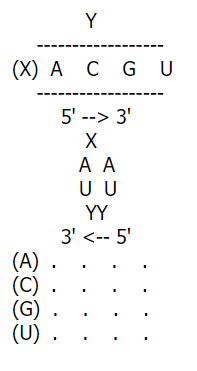
internal 1x2 loop ("AA", "UU", X, YY)
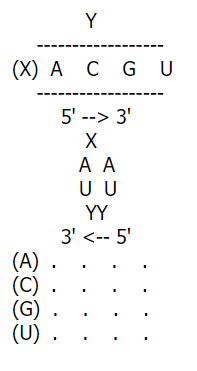
Exception: free energy and enthalpy changes for first mismatches in 1×(n-1) internal loops are 0 kcal/mol.

In [22]:
size_internal_para = {4:1.1, 5:2.0, 6:2.0}

with open('internal1x1.pickle', 'rb') as f:
    internal_1x1 = pickle.load(f)
f.close()

with open('internal1x2.pickle', 'rb') as f:
    internal_1x2 = pickle.load(f)
f.close()

with open('internal2x2.pickle', 'rb') as f:
    internal_2x2 = pickle.load(f)
f.close()

def internal(start1, end1, start2, end2):
    purine = "AG"
    pyrimidine = "CU"
    length1 = end1-start1+1
    length2 = start2-end2+1
    energy = 0
    
    if length1 == 1 and length2 == 1:
        energy += internal_1x1[(rna[start1-1]+rna[end1+1], rna[start2+1]+rna[end2-1], rna[start1], rna[start2])]
    elif  length1 == 1 and length2 == 2:
        energy += internal_1x2[(rna[start1-1]+rna[end1+1], rna[start2+1]+rna[end2-1], rna[start1], rna[end2:start2+1])]
    elif length1 == 2 and length2 == 1:
        energy += internal_1x2[(rna[end2-1]+rna[start2+1], rna[end1+1]+rna[start1-1], rna[start2], rna[end1:start1-1:-1])]
    elif length1 == 2 and length2 == 2:
        energy += internal_2x2[(rna[start1-1]+rna[end1+1], rna[start2+1]+rna[end2-1], rna[start1:end1+1], rna[end2:start2+1])]
    else:
        # initialization
        if length1+length2 in size_internal_para:
            energy += size_internal_para[length1+length2]
        elif length1+length2>6:
            energy += 2.0+1.08*math.log((length1+length2)/6)
        else: print("error in internal loop energy calculation")
        # asymetry
        energy += 0.6*abs(length1-length2)
        # terminal mismatch
        if (length1 == 2 and length2 == 3) or (length1 == 3 and length2 == 2):
            if rna[start1]=="A" and rna[start2]=="G":
                if rna[start1-1] in purine and rna[start2+1] in pyrimidine:
                    energy += 0.0
                elif rna[start1-1] in pyrimidine and rna[start2+1] in purine:
                    energy -= 0.5
            elif rna[start1]=="G" and rna[start2]=="A":
                if rna[start1-1] in purine and rna[start2+1] in pyrimidine:
                    energy -= 1.2
                elif rna[start1-1] in pyrimidine and rna[start2+1] in purine:
                    energy -= 1.1
            elif rna[start1]=="G" and rna[start2]=="G":
                energy -= 0.8
            elif rna[start1]=="U" and rna[start2]=="U":
                energy -= 0.4
            
            if rna[end1]=="A" and rna[end2]=="G":
                if rna[end2+1] in purine and rna[end1-1] in pyrimidine:
                    energy += 0.0
                elif rna[end2+1] in pyrimidine and rna[end1-1] in purine:
                    energy -= 0.5
            elif rna[end1]=="G" and rna[end2]=="A":
                if rna[end2+1] in purine and rna[end1-1] in pyrimidine:
                    energy -= 1.2
                elif rna[end2+1] in pyrimidine and rna[end1-1] in purine:
                    energy -= 1.1
            elif rna[end1]=="G" and rna[end2]=="G":
                energy -= 0.8
            elif rna[end1]=="U" and rna[end2]=="U":
                energy -= 0.4
                
        else:
            if rna[start1]=="A" and rna[start2]=="G":
                energy -= 0.8
            elif rna[start1]=="G" and rna[start2]=="A":
                energy -= 1.0
            elif rna[start1]=="G" and rna[start2]=="G":
                energy -= 1.2
            elif rna[start1]=="U" and rna[start2]=="U":
                energy -= 0.7
                
            if rna[end1]=="A" and rna[end2]=="G":
                energy -= 0.8
            elif rna[end1]=="G" and rna[end2]=="A":
                energy -= 1.0
            elif rna[end1]=="G" and rna[end2]=="G":
                energy -= 1.2
            elif rna[end1]=="U" and rna[end2]=="U":
                energy -= 0.7
        
    # Fixed Au/Gu Closure
    if (rna[start1-1]=="A" and rna[start2+1]=="U") or (rna[start1-1]=="U" and rna[start2+1]=="A"):
        energy -= 0.45
    elif (rna[start1-1]=="G" and rna[start2+1]=="U") or (rna[start1-1]=="U" and rna[start2+1]=="G"):
        energy -= 0.45
    if (rna[end1+1]=="A" and rna[end2-1]=="U") or (rna[end1+1]=="U" and rna[end2-1]=="A"):
        energy -= 0.45
    elif (rna[end1+1]=="G" and rna[end2-1]=="U") or (rna[end1+1]=="U" and rna[end2-1]=="G"):
        energy -= 0.45
            
    return energy

### Multibranch loop energy calculation

In [23]:
multibranch_a = 9.25
multibranch_b = 0.91
multibranch_c = -0.63
multibranch_strain = 3.14
def multibranch(mismatches):
    energy = 0
    # average asymmetry
    average_asymmetry = 0
    for i in range(len(mismatches)-1,-1,-1):
        average_asymmetry += abs((mismatches[i][1]-mismatches[i][0])-(mismatches[i-1][1]-mismatches[i-1][1]))
    average_asymmetry = min(2, average_asymmetry/len(mismatches))
    
    energy += multibranch_a+average_asymmetry*multibranch_b+len(mismatches)*multibranch_c
    
    # three-way branching loops with fewer than two unpaired nucleotides
    if len(mismatches) == 3:
        unpaired_nucleotides = 0
        for i, j in mismatches:
            unpaired_nucleotides += j-i-2
        if unpaired_nucleotides < 2:
            energy += multibranch_strain
            
    # terminal mismatch
    for i in range(len(mismatches)-1,-1,-1):
        energy += terminal_mismatch(rna[mismatches[i][0]]+rna[mismatches[i-1][1]], rna[mismatches[i][0]+1]+rna[mismatches[i-1][1]-1])
    return energy

### Loop energy calculation

In [24]:
def loop_energy(dot_notation):
    start = end = 0
    energy = 0.0
    is_hairpin = False
    is_left_loop = False
    is_right_loop = False
    is_multibranch_loop = False
    multibranch_loop_set = set()
#     print("".join(dot_notation))
    for i in range(len(dot_notation)-1):
        if dot_notation[i] == "." and dot_notation[i+1] == ".":
            pass
        elif dot_notation[i] == "." and dot_notation[i+1] == "(":
            if is_left_loop:
                count = 1
                for j in range(i+2, len(dot_notation)):
                    if dot_notation[j] == "(": count +=1
                    elif dot_notation[j] == ")": count -= 1
                    if count == 0:
                        if dot_notation[j+1] == ")":
                            try:
                                e = bulge(start, i, j, j+1)
                                energy += e
#                                 print("bulge", start, i, j, j+1, "energy = ", e)
                            except Exception as err:
                                print("".join(dot_notation))
                                print("bulge", start, i, j, j+1)
                                print(err)
                                sys.exit(1)
                            start = 0
                            break
                        elif dot_notation[j+1] == ".":
                            end2 = j+1
                            start2 = j+1
                            while  dot_notation[start2+1] == ".":
                                start2 += 1
                            if dot_notation[start2+1] == ")":
                                try:
                                    e = internal(start,i,start2,end2)
                                    energy += e
#                                     print("internal", start, i, start2, end2, "energy = ",e)
                                except Exception as err:
                                    print("".join(dot_notation))
                                    print("internal", start, i, start2, end2)
                                    print(err)
                                    sys.exit(1)
                                start = 0
                            break
                        break
            
            if is_multibranch_loop:
            # Multi branch check
                j = 1
                position = i+2
                multi_start = None
                multi_end = None
                multi_start_count = False
                multibranch_loop = [(start-1, i+1)]
                while j>=0:
                    if position >= len(dot_notation):
                        is_multibranch_loop = False
                        break
                    if j == 0 and not multi_start_count:
                        multi_start_count = True
                        multi_start = position-1
                    if j == 0 and multi_start_count and dot_notation[position] != ".":
                        multibranch_loop.append((multi_start, position))
                        multi_start_count = False
                    if dot_notation[position] == "(":
                        j += 1
                    elif dot_notation[position] == ")":
                        j -= 1
                    position += 1
                j = 1
                position = start-2
                multi_start = None
                multi_end = None
                multi_start_count = False
                while j>=0:
                    if position < 0:
                        is_multibranch_loop = False
                        break
                    if j == 0 and not multi_start_count:
                        multi_start_count = True
                        multi_start = position+1
                    if j == 0 and multi_start_count and dot_notation[position] != ".":
                        multibranch_loop = [(position, multi_start)]+multibranch_loop
                        multi_start_count = False
                    if dot_notation[position] == ")":
                        j += 1
                    elif dot_notation[position] == "(":
                        j -= 1
                    position -= 1
            if is_multibranch_loop:
                multibranch_loop_set.add(tuple(multibranch_loop))
                is_multibranch_loop = False
            
            is_left_loop = False
            is_hairpin = False
            is_right_loop = False
            
        elif dot_notation[i] == "." and dot_notation[i+1] == ")":
            if is_hairpin:
                try:
                    e = hairpin(start, i)
                    energy += e
#                   print("hairpin", start, i, "energy = ", e)
                except Exception as err:
                    print("".join(dot_notation))
                    print("hairpin", start, i)
                    print(err)
                    sys.exit(1)
                start = 0
            if is_right_loop:
                count = 1
                for j in range(start-2, -1, -1):
                    if dot_notation[j] == ")": count +=1
                    elif dot_notation[j] == "(": count -= 1
                    if count == 0:
                        if dot_notation[j-1] == "(":
                            try:
                                e = bulge(start, i, j-1, j)
                                energy += e
#                                 print("bulge", start, i, j-1, j, "energy = ", e)
                            except Exception as err:
                                print("".join(dot_notation))
                                print("bulge", start, i, j-1, j)
                                print(err)
                                sys.exit(1)
                            start = 0
                        break
            is_hairpin = False
            is_left_loop = False
            is_right_loop = False
            is_multibranch_loop = False
        elif dot_notation[i] == "(" and dot_notation[i+1] == ".":
            is_hairpin = True
            is_left_loop = True
            start = i+1
            is_right_loop = False
            is_multibranch_loop = False
        elif dot_notation[i] == "(" and dot_notation[i+1] == "(":
            is_hairpin = False
            is_left_loop = False
            is_right_loop = False
            is_multibranch_loop = False
        elif dot_notation[i] == "(" and dot_notation[i+1] == ")":
            is_hairpin = False
            is_left_loop = False
            is_right_loop = False
        elif dot_notation[i] == ")" and dot_notation[i+1] == ".":
            is_hairpin = False
            is_left_loop = False
            is_right_loop = True
            start = i+1
            is_multibranch_loop = True
        elif dot_notation[i] == ")" and dot_notation[i+1] == "(":
            is_hairpin = False
            is_left_loop = False
            is_right_loop = False

            # Multi branch check
            j = 1
            position = i+2
            multi_start = None
            multi_end = None
            multi_start_count = False
            multibranch_loop = [(i, i+1)]
            while j>=0:
                if position >= len(dot_notation):
                    is_multibranch_loop = False
                    break
                if j == 0 and not multi_start_count:
                    multi_start_count = True
                    multi_start = position-1
                if j == 0 and multi_start_count and dot_notation[position] != ".":
                    multibranch_loop.append((multi_start, position))
                    multi_start_count = False
                if dot_notation[position] == "(":
                    j += 1
                elif dot_notation[position] == ")":
                    j -= 1
                position += 1
            j = 1
            position = i-1
            multi_start = None
            multi_end = None
            multi_start_count = False
            while j>=0:
                if position < 0:
                    is_multibranch_loop = False
                    break
                if j == 0 and not multi_start_count:
                    multi_start_count = True
                    multi_start = position+1
                if j == 0 and multi_start_count and dot_notation[position] != ".":
                    multibranch_loop = [(position, multi_start)]+multibranch_loop
                    multi_start_count = False
                if dot_notation[position] == ")":
                    j += 1
                elif dot_notation[position] == "(":
                    j -= 1
                position -= 1
            if is_multibranch_loop:
                multibranch_loop_set.add(tuple(multibranch_loop))
                is_multibranch_loop = False
            
            is_multibranch_loop = False
                
        elif dot_notation[i] == ")" and dot_notation[i+1] == ")":
            is_hairpin = False
            is_left_loop = False
            is_right_loop = False
            is_multibranch_loop = False
    
    for i in multibranch_loop_set:
        try:
            e = multibranch(i)
            energy += e
#             print("multibranch : ", i, "energy = ", e)
        except Exception as err:
            print("".join(dot_notation))
            print("multibranch : ", i)
            print(err)
            sys.exit(1)
    return energy

## PERFORMANCE GRAPH  

<IPython.core.display.Javascript object>


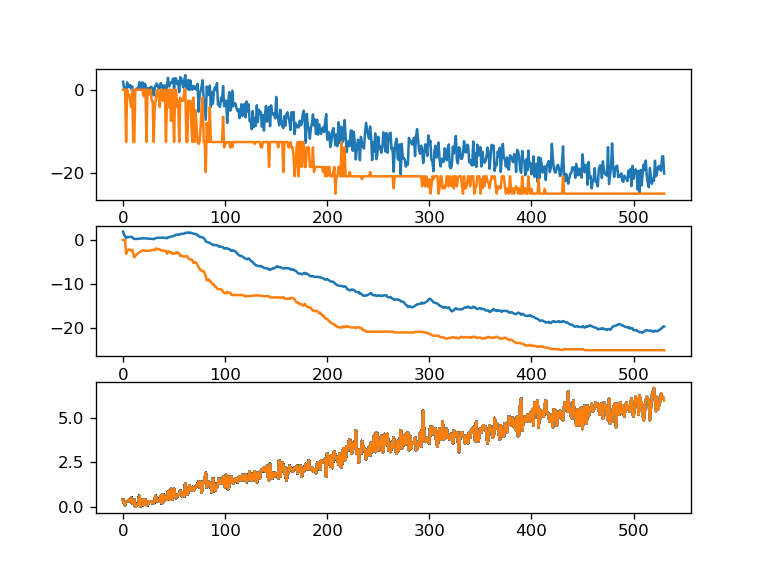

In [25]:
# def plot_Output():
#     data = np.loadtxt('output2.dat')
#     plt.plot(np.arange(generation_max), fitness_avg_data, fitness_max_data)
#     plt.xlabel('Generation')
#     plt.ylabel('Free Energy')
#     plt.xlim(0.0, 2000)
#     plt.show()

fig = plt.figure()
ax = fig.add_subplot(311)   #top left
ax2 = fig.add_subplot(312)   #top right
ax3 = fig.add_subplot(313)

plt.ion()

fig.show()
fig.canvas.draw()

moving_avg_fitness = np.zeros(generation_max)
moving_avg_fitness_max = np.zeros(generation_max)
helix_use_avg = np.zeros(generation_max)
moving_range = 20

def plot_Output():
    global generation
    if generation < moving_range:
        moving_avg_fitness[generation] = np.mean(fitness_avg_data[:generation+1])
        moving_avg_fitness_max[generation] = np.mean(fitness_max_data[:generation+1])
    else:
        moving_avg_fitness[generation] = np.mean(fitness_avg_data[generation-moving_range:generation+1])
        moving_avg_fitness_max[generation] = np.mean(fitness_max_data[generation-moving_range:generation])
    
    ax.clear()
    ax2.clear()
    ax.plot(np.arange(generation), fitness_avg_data[:generation], fitness_max_data[:generation])
    ax2.plot(np.arange(generation), moving_avg_fitness[:generation], moving_avg_fitness_max[:generation])
    ax3.plot(np.arange(generation), helix_use_avg[:generation]/popSize)
    fig.canvas.draw()

### Test helix
ทดสอบว่า helix ใส่ได้หรือไม่

In [26]:
def test_helix(use_helix, test):
    for helix in use_helix:
        if (helix[0]>test[0]+test[2]-1 and  helix[0]+ helix[2]-1<test[1]-test[2]+1) ^\
        (helix[1]- helix[2]+1>test[0]+test[2]-1 and  helix[1]<test[1]-test[2]+1):
            return False
    return True

## Depth first search to find lowest energy of population

In [27]:
import copy
f_lowest_energy = np.Infinity
f_use_helix = []
f_dot_notation = ""

def find_lowest_energy(possible_helix=[], find_energy=0, dot_notation=["." for x in range(len(rna))], use_helix=[], use_test_helix=[]):

    global f_lowest_energy, f_use_helix, f_dot_notation
    
    if not possible_helix:
#         print("helix energy = ", find_energy)
        find_energy += loop_energy(dot_notation)
        if find_energy < f_lowest_energy:
            f_lowest_energy = find_energy
            f_use_helix = use_helix
            f_dot_notation = dot_notation

    for select_helix in possible_helix:
        next_dot_notation = copy.deepcopy(dot_notation)
        next_find_energy = find_energy
        next_use_test_helix = copy.deepcopy(use_test_helix)
        is_use = False
        is_use_helix = False
        is_use_full_helix = False
        start_helix = end_helix = helix_length = None
        for j in range(stem_pool[select_helix][2]):
            if not is_use and next_dot_notation[stem_pool[select_helix][0]+j] == "." and next_dot_notation[stem_pool[select_helix][1]-j] == ".":
                is_use = True
                start_helix = stem_pool[select_helix][0]+j
                end_helix = stem_pool[select_helix][1]-j
                helix_length = 1
            elif is_use and next_dot_notation[stem_pool[select_helix][0]+j] == "." and next_dot_notation[stem_pool[select_helix][1]-j] == "." and\
            test_helix(use_test_helix, (start_helix, end_helix, helix_length)):
                is_use_helix = True
                next_dot_notation[stem_pool[select_helix][0]+j] = "("
                next_dot_notation[stem_pool[select_helix][0]+j-1] = "("
                next_dot_notation[stem_pool[select_helix][1]-j] = ")"
                next_dot_notation[stem_pool[select_helix][1]-j+1] = ")"
                helix_length += 1
            elif is_use and helix_length > 1:
                if helix_length == stem_pool[select_helix][2]:
                    is_use_full_helix = True
                next_use_test_helix.append((start_helix, end_helix, helix_length))
                is_use = False
                next_find_energy += INNHB((start_helix, end_helix, helix_length))
            else:
                is_use = False
        if is_use and helix_length > 1:
            if helix_length == stem_pool[select_helix][2]:
                    is_use_full_helix = True
            next_use_test_helix.append((start_helix, end_helix, helix_length))
            next_find_energy += INNHB((start_helix, end_helix, helix_length))
        
        next_use_helix = copy.deepcopy(use_helix)
        if is_use_helix:
            next_use_helix.append(select_helix)
            
        next_possible_helix = copy.deepcopy(possible_helix)
        next_possible_helix.remove(select_helix)
        
        # remove cross helix
        if is_use_full_helix:
            for helix in possible_helix:
                if helix_overlap_cross[select_helix, helix] == 1 and helix != select_helix:
#                     print("use full helix, remove ", helix)
                    next_possible_helix.remove(helix)
        else:
            for helix in possible_helix:
                if helix_cross[select_helix, helix] == 1 and helix != select_helix:
#                     print("use partial helix, remove ", helix)
                    next_possible_helix.remove(helix)
                
#         print(next_possible_helix, next_use_helix, next_use_test_helix)
#         print(next_find_energy)
#         print("".join(next_dot_notation))
        find_lowest_energy(next_possible_helix, next_find_energy, next_dot_notation, next_use_helix, next_use_test_helix)
    return 0

### Energy calculation to put all helix with no overlap before find_lowest_energy()

In [28]:
def energy_calculation(possible_helix):
#     print("posible helix = ", len(possible_helix), possible_helix)
    use_helix = []
    dot_notation = ["." for x in range(len(rna))]
    energy = 0
    
    if len(possible_helix)>=13:
        find_lowest_energy([], 0, dot_notation, use_helix)
        return
        
    for i in possible_helix:
        is_overlap = False
        for j in possible_helix:
            if i != j and helix_overlap[i, j] == 1:
                is_overlap = True
                break
        if not is_overlap:
            use_helix.append(i)
            dot_notation[stem_pool[i][0]:stem_pool[i][0]+stem_pool[i][2]] = ["("]*stem_pool[i][2]
            dot_notation[stem_pool[i][1]:stem_pool[i][1]-stem_pool[i][2]:-1] = [")"]*stem_pool[i][2]
            energy += INNHB(stem_pool[i])
    for i in use_helix:
        possible_helix.remove(i)
    find_lowest_energy(possible_helix, energy, dot_notation, use_helix, [])

## FITNESS EVALUATION
### ตรวจสอบโอกาศการอยู่รอดของแต่ละประชากร
ใช้ INN-HB (Individual Nearest Neighbor Hydrogen Bond) เป็นสมการเป้าหมาย

In [29]:
fitness = np.empty([popSize])
best_chrom = np.empty([generation_max])
fitness_avg_data = np.zeros(generation_max)
fitness_max_data = np.zeros(generation_max)
notation = np.empty(popSize, dtype="U"+str(len(rna)))
generation = 0
best_use_helix = np.empty([popSize], dtype=object)

In [30]:
def Fitness_evaluation(generation):
    global f_lowest_energy, f_use_helix, f_dot_notation
    
    sum_sqr = 0
    fitness_average = 0
    variance = 0
    
    for i in range(popSize):
        f_lowest_energy = np.Infinity
        f_use_helix = []
        f_dot_notation = ["." for x in range(len(rna))]
        
        
        helix_use_avg[generation] += len(np.where(chromosome[i]==1)[0].tolist())
        energy_calculation(np.where(chromosome[i]==1)[0].tolist())
#         find_lowest_energy(np.where(chromosome[i]==1)[0].tolist(), 0, f_dot_notation,[])
        
#         print("test", f_use_helix, [qpv[i, j, 1]**2 for j in range(20)])
#         print(f_lowest_energy)
        
        fitness[i] = f_lowest_energy*-1
        notation[i] =  "".join(f_dot_notation)
        best_use_helix[i] = f_use_helix


    fitness_total = sum(fitness)*-1
    fitness_average = np.mean(fitness)*-1
    fitness_avg_data[generation] = fitness_average
    fitness_max_data[generation] = max(fitness)*-1
    best_chrom[generation] = np.where(fitness == max(fitness))[0][0]
    # Statistical output
#     f = open("output2.dat", "a")
#     f.write(str(generation) + " " + str(fitness_average) + "\n")
#     f.write(" \n")
#     f.close()
    print("Population size = ", popSize)
    print("mean fitness = ", fitness_average)
    print("Std. deviation = ", np.std(fitness))
    print("min population = ", best_chrom[generation])
    print("fitness sum = ", fitness_total)
    print("min energy = ", fitness_max_data[generation])
    print("use_helix = ", best_use_helix[int(best_chrom[generation])])

    print(chromosome[int(best_chrom[generation])])
    print(notation[int(best_chrom[generation])])
    plot_Output()

In [31]:
Fitness_evaluation(0)

Population size =  10
mean fitness =  1.9074170716361718
Std. deviation =  2.776058299323741
min population =  0.0
fitness sum =  19.074170716361717
min energy =  0.0
use_helix =  []
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
.........................................................


## QUANTUM ROTATION GATE 
### หมุน qbit เพื่อปรับปรุงประชากร

In [32]:
def rotate(i, j, delta):
    theta[i, j] += delta
    if math.cos(theta[i, j])**2 < 1e-6:
        theta[i, j] = math.acos(math.sqrt(1e-6))
    elif math.cos(theta[i, j])**2 > 1-1e-6:
        theta[i, j] = math.acos(1-math.sqrt(1e-6))
        
        
def rotation(delta_theta, use_helix):
    print("rotate", use_helix)
    if use_helix == []:
        return
    # Lookup table of the rotation angle
    for i in range(popSize):
        for j in range(genomeLength):
            if fitness[i]*-1 > fitness[int(best_chrom[int(generation)])]*-1:
                if j in use_helix and chromosome[i, j] == 0:
                    rotate(i, j, delta_theta*(math.cos(theta[i, j])**2))
                elif j not in use_helix and chromosome[i, j] == 0:
                     rotate(i, j, -0.2*delta_theta*(1-math.cos(theta[i, j])**2))
            if fitness[i] == fitness[int(best_chrom[int(generation)])]:
                if chromosome[i, j] == 1 and j not in use_helix:
                     rotate(i, j, -delta_theta*(1-math.cos(theta[i, j])**2))

## QUANTUM MUTATION GATE
### การกลายพันธ์ของประชากรเพื่อเพิ่มความหลากหลาย

In [33]:
def mutation(pop_mutation_rate, mutation_rate):
    for i in range(popSize):
        if random.random() <= pop_mutation_rate:
            for j in range(genomeLength):
                if random.random() <= mutation_rate:
                    theta[i, j] = math.pi/2
    create_qbit()

### Compare Secondary Structure
input is string dot notation

In [34]:
def compare(predict_rna, real_rna):
    predict_rna = list(predict_rna)
    real_rna = list(real_rna)
    
    predict_rna_pair = set()
    real_rna_pair = set()
    
    while predict_rna != ["."]*len(predict_rna):
        for i, j in enumerate(predict_rna):
            if j == "(":
                start = i
            elif j == ")":
                predict_rna_pair.add((start, i))
                predict_rna[start] = "."
                predict_rna[i] = "."
                break
        
    while real_rna != ["."]*len(real_rna):
        for i, j in enumerate(real_rna):
            if j == "(":
                start = i
            elif j == ")":
                real_rna_pair.add((start, i))
                real_rna[start] = "."
                real_rna[i] = "."
                break
                
    tp = len(predict_rna_pair.intersection(real_rna_pair))
    fp = len(predict_rna_pair-real_rna_pair)
    fn = len(real_rna_pair-predict_rna_pair)
    sensitivity = tp/len(real_rna_pair)
    specificity = tp/len(predict_rna_pair)
    if sensitivity+specificity == 0:
        f_measure = 0
    else:
        f_measure = 2*((sensitivity*specificity)/(sensitivity+specificity))
    return tp, fp, fn, sensitivity, specificity, f_measure

In [35]:
last_fitness = np.inf
fitness_repeat = 0
while (generation < generation_max - 1):
    print("The best of generation [", generation, "] ", best_chrom[generation])
    print()
    print("============== GENERATION: ", generation + 1, " =========================== ")
    print()
    rotation(0.008*math.pi, best_use_helix[int(best_chrom[generation])])
    mutation(0.01, 0.005)
    generation = generation + 1
    Measure()
    Fitness_evaluation(generation)
    if fitness_max_data[generation] == last_fitness:
        fitness_repeat += 1
    else:
        last_fitness = fitness_max_data[generation]
        fitness_repeat = 1
    if fitness_repeat == 100:
        break
# compare(notation[int(best_chrom[generation])], "((((((...........((((((....)))))).))))))")

The best of generation [ 0 ]  0.0

============== GENERATION:  1  =========================== 

rotate []
Population size =  10
mean fitness =  0.39472774099814184
Std. deviation =  0.9561911277946912
min population =  1.0
fitness sum =  3.9472774099814183
min energy =  0.0
use_helix =  []
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
.........................................................
The best of generation [ 1 ]  1.0

============== GENERATION:  2  =========================== 

rotate []
Population size =  10
mean fitness =  0.49903838401169465
Std. deviation =  1.4971151520350836
min population =  1.0
fitness sum =  4.990383840116946
min energy =  0.0
use_helix =  []
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Population size =  10
mean fitness =  0.45199999999999996
Std. deviation =  0.968966459687847
min population =  0.0
fitness sum =  4.52
min energy =  0.0
use_helix =  []
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
.........................................................
The best of generation [ 15 ]  0.0

============== GENERATION:  16  =========================== 

rotate []
Population size =  10
mean fitness =  1.8040364584571413
Std. deviation =  2.2512197797255995
min population =  0.0
fitness sum =  18.040364584571414
min energy =  0.0
use_helix =  []
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

Population size =  10
mean fitness =  0.16947335491284027
Std. deviation =  1.6019943040016864
min population =  8.0
fitness sum =  1.6947335491284026
min energy =  -2.653705116980011
use_helix =  [92]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
............................(((((...........)))))........
The best of generation [ 29 ]  8.0

============== GENERATION:  30  =========================== 

rotate [92]
Population size =  10
mean fitness =  -1.3768827190815351
Std. deviation =  3.7420579832495537
min population =  9.0
fitness sum =  -13.768827190815351
min energy =  -12.549999999999999
use_helix =  [43]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Population size =  10
mean fitness =  0.665752840945717
Std. deviation =  2.1971190256827353
min population =  5.0
fitness sum =  6.65752840945717
min energy =  -2.653705116980011
use_helix =  [92]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
............................(((((...........)))))........
The best of generation [ 43 ]  5.0

============== GENERATION:  44  =========================== 

rotate [92]
Population size =  10
mean fitness =  2.856361990085292
Std. deviation =  2.756612474696353
min population =  0.0
fitness sum =  28.56361990085292
min energy =  0.0
use_helix =  []
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Population size =  10
mean fitness =  2.7187500984174475
Std. deviation =  4.4303498630141
min population =  4.0
fitness sum =  27.187500984174477
min energy =  -2.653705116980011
use_helix =  [92]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
............................(((((...........)))))........
The best of generation [ 57 ]  4.0

============== GENERATION:  58  =========================== 

rotate [92]
Population size =  10
mean fitness =  1.5334089764757892
Std. deviation =  3.211436540322231
min population =  8.0
fitness sum =  15.334089764757891
min energy =  -2.653705116980011
use_helix =  [92]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Population size =  10
mean fitness =  0.7338255647377401
Std. deviation =  3.847045162207333
min population =  2.0
fitness sum =  7.3382556473774
min energy =  -4.896630860180846
use_helix =  [50, 66]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((....................(((.....)))..............))))))
The best of generation [ 71 ]  2.0

============== GENERATION:  72  =========================== 

rotate [50, 66]
Population size =  10
mean fitness =  0.01658945047422371
Std. deviation =  3.5015601905818285
min population =  9.0
fitness sum =  0.1658945047422371
min energy =  -8.705229815185586
use_helix =  [28, 116, 43]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 

Population size =  10
mean fitness =  0.9852519749572662
Std. deviation =  3.232406238947002
min population =  8.0
fitness sum =  9.85251974957266
min energy =  -4.182884493226237
use_helix =  [31]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
.........(((((..................)))))....................
The best of generation [ 85 ]  8.0

============== GENERATION:  86  =========================== 

rotate [31]
Population size =  10
mean fitness =  -4.139953440061829
Std. deviation =  6.863662458257331
min population =  1.0
fitness sum =  -41.399534400618286
min energy =  -12.549999999999999
use_helix =  [43]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Population size =  10
mean fitness =  -3.9668255557201446
Std. deviation =  6.646200114211576
min population =  8.0
fitness sum =  -39.66825555720145
min energy =  -13.829999999999998
use_helix =  [43, 116]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0]
.................(((((((....)))))))........((((.....)))).
The best of generation [ 99 ]  8.0

============== GENERATION:  100  =========================== 

rotate [43, 116]
Population size =  10
mean fitness =  -2.678089064022109
Std. deviation =  7.158842741380385
min population =  4.0
fitness sum =  -26.78089064022108
min energy =  -12.549999999999999
use_helix =  [43]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 

Population size =  10
mean fitness =  -4.6627410450409394
Std. deviation =  6.209692733302433
min population =  1.0
fitness sum =  -46.62741045040939
min energy =  -12.549999999999999
use_helix =  [43]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
.................(((((((....)))))))......................
The best of generation [ 113 ]  1.0

============== GENERATION:  114  =========================== 

rotate [43]
Population size =  10
mean fitness =  -6.8220630462190455
Std. deviation =  7.522551769535194
min population =  0.0
fitness sum =  -68.22063046219047
min energy =  -12.549999999999999
use_helix =  [43]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Population size =  10
mean fitness =  -5.119554085070213
Std. deviation =  6.573177663350166
min population =  3.0
fitness sum =  -51.19554085070213
min energy =  -12.549999999999999
use_helix =  [43]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
.................(((((((....)))))))......................
The best of generation [ 127 ]  3.0

============== GENERATION:  128  =========================== 

rotate [43]
Population size =  10
mean fitness =  -9.009488868555113
Std. deviation =  4.355604450562814
min population =  1.0
fitness sum =  -90.09488868555113
min energy =  -12.549999999999999
use_helix =  [43]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

The best of generation [ 140 ]  6.0

============== GENERATION:  141  =========================== 

rotate [43]
Population size =  10
mean fitness =  -7.687997713611837
Std. deviation =  5.7573655741836784
min population =  0.0
fitness sum =  -76.87997713611837
min energy =  -12.549999999999999
use_helix =  [43]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
.................(((((((....)))))))......................
The best of generation [ 141 ]  0.0

============== GENERATION:  142  =========================== 

rotate [43]
Population size =  10
mean fitness =  -6.2547067643817655
Std. deviation =  5.33463920610242
min population =  0.0
fitness sum =  -62.54706764381767
min energy =  -12.549999999999999
use_helix =  [43]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Population size =  10
mean fitness =  -7.597707279284114
Std. deviation =  6.079293631018741
min population =  3.0
fitness sum =  -75.97707279284114
min energy =  -12.549999999999999
use_helix =  [43]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
.................(((((((....)))))))......................
The best of generation [ 155 ]  3.0

============== GENERATION:  156  =========================== 

rotate [43]
Population size =  10
mean fitness =  -8.834873585898169
Std. deviation =  3.4964972334392725
min population =  4.0
fitness sum =  -88.34873585898171
min energy =  -12.549999999999999
use_helix =  [43]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


============== GENERATION:  169  =========================== 

rotate [43, 45, 50]
Population size =  10
mean fitness =  -7.9811662186208
Std. deviation =  6.2525556476749005
min population =  6.0
fitness sum =  -79.811662186208
min energy =  -18.525596411481622
use_helix =  [50, 43]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((...........(((((((....)))))))................))))))
The best of generation [ 169 ]  6.0

============== GENERATION:  170  =========================== 

rotate [50, 43]
Population size =  10
mean fitness =  -9.014363904340033
Std. deviation =  4.449304856576456
min population =  8.0
fitness sum =  -90.14363904340033
min energy =  -13.829999999999998
use_helix =  [43, 116]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0

Population size =  10
mean fitness =  -11.761433227046332
Std. deviation =  3.209034881095911
min population =  3.0
fitness sum =  -117.61433227046334
min energy =  -18.525596411481622
use_helix =  [43, 50]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((...........(((((((....)))))))................))))))
The best of generation [ 183 ]  3.0

============== GENERATION:  184  =========================== 

rotate [43, 50]
Population size =  10
mean fitness =  -9.142755789332401
Std. deviation =  5.448467891595929
min population =  7.0
fitness sum =  -91.42755789332402
min energy =  -18.525596411481622
use_helix =  [43, 50]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

Population size =  10
mean fitness =  -10.154910245527775
Std. deviation =  4.9803946175782805
min population =  4.0
fitness sum =  -101.54910245527775
min energy =  -18.525596411481622
use_helix =  [43, 50]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((...........(((((((....)))))))................))))))
The best of generation [ 197 ]  4.0

============== GENERATION:  198  =========================== 

rotate [43, 50]
Population size =  10
mean fitness =  -7.5155213596994175
Std. deviation =  8.03367757732463
min population =  5.0
fitness sum =  -75.15521359699417
min energy =  -20.769999999999996
use_helix =  [43, 50, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0

Population size =  10
mean fitness =  -13.555580942079477
Std. deviation =  4.917623788250151
min population =  5.0
fitness sum =  -135.55580942079476
min energy =  -20.747015994025
use_helix =  [43, 45, 50]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((.........(((((((((....)))))))..))............))))))
The best of generation [ 210 ]  5.0

============== GENERATION:  211  =========================== 

rotate [43, 45, 50]
Population size =  10
mean fitness =  -7.825715419396509
Std. deviation =  7.559833743328468
min population =  7.0
fitness sum =  -78.25715419396509
min energy =  -18.525596411481622
use_helix =  [43, 50]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0

Population size =  10
mean fitness =  -9.793970244216867
Std. deviation =  5.538953835228598
min population =  9.0
fitness sum =  -97.93970244216867
min energy =  -20.769999999999996
use_helix =  [43, 50, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 0]
((((((...........(((((((....)))))))((.....)).......))))))
The best of generation [ 223 ]  9.0

============== GENERATION:  224  =========================== 

rotate [43, 50, 96]
Population size =  10
mean fitness =  -9.818201276438522
Std. deviation =  9.32422017630745
min population =  5.0
fitness sum =  -98.18201276438522
min energy =  -20.769999999999996
use_helix =  [43, 50, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

Population size =  10
mean fitness =  -14.110362648336727
Std. deviation =  5.6366084183166905
min population =  5.0
fitness sum =  -141.10362648336726
min energy =  -20.769999999999996
use_helix =  [43, 50, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((...........(((((((....)))))))((.....)).......))))))
The best of generation [ 236 ]  5.0

============== GENERATION:  237  =========================== 

rotate [43, 50, 96]
Population size =  10
mean fitness =  -10.37091953890193
Std. deviation =  7.494832334460546
min population =  0.0
fitness sum =  -103.70919538901931
min energy =  -20.769999999999996
use_helix =  [43, 50, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 

Population size =  10
mean fitness =  -15.701220372994197
Std. deviation =  8.143425020615533
min population =  2.0
fitness sum =  -157.01220372994197
min energy =  -20.769999999999996
use_helix =  [43, 50, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((...........(((((((....)))))))((.....)).......))))))
The best of generation [ 249 ]  2.0

============== GENERATION:  250  =========================== 

rotate [43, 50, 96]
Population size =  10
mean fitness =  -11.2927422274803
Std. deviation =  8.826749380431828
min population =  3.0
fitness sum =  -112.92742227480298
min energy =  -20.769999999999996
use_helix =  [43, 50, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

Population size =  10
mean fitness =  -10.310984553406282
Std. deviation =  10.038697416083734
min population =  2.0
fitness sum =  -103.10984553406284
min energy =  -20.769999999999996
use_helix =  [43, 50, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((...........(((((((....)))))))((.....)).......))))))
The best of generation [ 262 ]  2.0

============== GENERATION:  263  =========================== 

rotate [43, 50, 96]
Population size =  10
mean fitness =  -14.275660731846036
Std. deviation =  8.040253770673797
min population =  2.0
fitness sum =  -142.75660731846037
min energy =  -20.769999999999996
use_helix =  [50, 43, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0

Population size =  10
mean fitness =  -16.402471008874976
Std. deviation =  4.266911431571119
min population =  2.0
fitness sum =  -164.0247100887498
min energy =  -20.769999999999996
use_helix =  [43, 50, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0]
((((((...........(((((((....)))))))((.....)).......))))))
The best of generation [ 275 ]  2.0

============== GENERATION:  276  =========================== 

rotate [43, 50, 96]
Population size =  10
mean fitness =  -16.81408262266672
Std. deviation =  4.550336314462314
min population =  1.0
fitness sum =  -168.1408262266672
min energy =  -20.769999999999996
use_helix =  [43, 50, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0

Population size =  10
mean fitness =  -9.452474003011245
Std. deviation =  10.292347550075563
min population =  8.0
fitness sum =  -94.52474003011245
min energy =  -20.769999999999996
use_helix =  [43, 50, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((...........(((((((....)))))))((.....)).......))))))
The best of generation [ 288 ]  8.0

============== GENERATION:  289  =========================== 

rotate [43, 50, 96]
Population size =  10
mean fitness =  -11.960529897147875
Std. deviation =  8.16264329819375
min population =  2.0
fitness sum =  -119.60529897147876
min energy =  -20.769999999999996
use_helix =  [50, 43, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 

Population size =  10
mean fitness =  -16.777743122713648
Std. deviation =  8.564558232151532
min population =  1.0
fitness sum =  -167.77743122713647
min energy =  -23.18
use_helix =  [8, 43, 50]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((..((.....))(((((((....)))))))................))))))
The best of generation [ 302 ]  1.0

============== GENERATION:  303  =========================== 

rotate [8, 43, 50]
Population size =  10
mean fitness =  -17.242349872823844
Std. deviation =  4.393080587773265
min population =  2.0
fitness sum =  -172.42349872823843
min energy =  -20.769999999999996
use_helix =  [43, 50, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0

Population size =  10
mean fitness =  -14.061335261308585
Std. deviation =  7.069001326428512
min population =  8.0
fitness sum =  -140.61335261308585
min energy =  -23.65351726578656
use_helix =  [43, 52, 50, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((....(((....(((((((....)))))))((.....)).)))...))))))
The best of generation [ 315 ]  8.0

============== GENERATION:  316  =========================== 

rotate [43, 52, 50, 96]
Population size =  10
mean fitness =  -14.844363433435428
Std. deviation =  6.412759459926222
min population =  3.0
fitness sum =  -148.44363433435427
min energy =  -23.18
use_helix =  [50, 8, 43]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0

The best of generation [ 328 ]  7.0

============== GENERATION:  329  =========================== 

rotate [43, 49, 50]
Population size =  10
mean fitness =  -13.808327841569973
Std. deviation =  7.08544693400644
min population =  8.0
fitness sum =  -138.08327841569977
min energy =  -20.769999999999996
use_helix =  [43, 50, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((...........(((((((....)))))))((.....)).......))))))
The best of generation [ 329 ]  8.0

============== GENERATION:  330  =========================== 

rotate [43, 50, 96]
Population size =  10
mean fitness =  -14.194735351630706
Std. deviation =  7.3586677211991045
min population =  2.0
fitness sum =  -141.94735351630706
min energy =  -20.769999999999996
use_helix =  [50, 43, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

The best of generation [ 341 ]  3.0

============== GENERATION:  342  =========================== 

rotate [43, 50, 96]
Population size =  10
mean fitness =  -18.17826124055066
Std. deviation =  4.126556406501248
min population =  3.0
fitness sum =  -181.78261240550657
min energy =  -20.769999999999996
use_helix =  [43, 50, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((...........(((((((....)))))))((.....)).......))))))
The best of generation [ 342 ]  3.0

============== GENERATION:  343  =========================== 

rotate [43, 50, 96]
Population size =  10
mean fitness =  -12.400862889636738
Std. deviation =  10.664106695587241
min population =  2.0
fitness sum =  -124.00862889636738
min energy =  -20.769999999999996
use_helix =  [50, 43, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

The best of generation [ 354 ]  8.0

============== GENERATION:  355  =========================== 

rotate [8, 43, 50]
Population size =  10
mean fitness =  -17.13804961611185
Std. deviation =  5.424951745007773
min population =  3.0
fitness sum =  -171.3804961611185
min energy =  -20.769999999999996
use_helix =  [43, 50, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((...........(((((((....)))))))((.....)).......))))))
The best of generation [ 355 ]  3.0

============== GENERATION:  356  =========================== 

rotate [43, 50, 96]
Population size =  10
mean fitness =  -15.897753071628841
Std. deviation =  5.586284225001264
min population =  3.0
fitness sum =  -158.9775307162884
min energy =  -20.769999999999996
use_helix =  [43, 50, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

The best of generation [ 367 ]  6.0

============== GENERATION:  368  =========================== 

rotate [50, 8, 43]
Population size =  10
mean fitness =  -15.996442239367587
Std. deviation =  6.4316791552593156
min population =  9.0
fitness sum =  -159.96442239367587
min energy =  -23.65351726578656
use_helix =  [43, 52, 50, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((....(((....(((((((....)))))))((.....)).)))...))))))
The best of generation [ 368 ]  9.0

============== GENERATION:  369  =========================== 

rotate [43, 52, 50, 96]
Population size =  10
mean fitness =  -13.923385276518417
Std. deviation =  9.966784047832984
min population =  1.0
fitness sum =  -139.23385276518417
min energy =  -23.18
use_helix =  [8, 43, 50]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0

The best of generation [ 380 ]  7.0

============== GENERATION:  381  =========================== 

rotate [43, 52, 50, 96]
Population size =  10
mean fitness =  -16.685263508317643
Std. deviation =  8.858535887358356
min population =  4.0
fitness sum =  -166.85263508317644
min energy =  -24.922820627538638
use_helix =  [43, 50, 52, 45]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((....(((..(((((((((....)))))))..))......)))...))))))
The best of generation [ 381 ]  4.0

============== GENERATION:  382  =========================== 

rotate [43, 50, 52, 45]
Population size =  10
mean fitness =  -17.36811273522382
Std. deviation =  8.691017060604151
min population =  5.0
fitness sum =  -173.6811273522382
min energy =  -23.65351726578656
use_helix =  [96, 50, 52, 43]
[0 0 0 0 0 0 0 0 0 0

The best of generation [ 393 ]  2.0

============== GENERATION:  394  =========================== 

rotate [43, 96, 50, 52]
Population size =  10
mean fitness =  -20.509950209619152
Std. deviation =  4.344110640589006
min population =  7.0
fitness sum =  -205.09950209619151
min energy =  -23.65351726578656
use_helix =  [43, 52, 50, 96]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((....(((....(((((((....)))))))((.....)).)))...))))))
The best of generation [ 394 ]  7.0

============== GENERATION:  395  =========================== 

rotate [43, 52, 50, 96]
Population size =  10
mean fitness =  -16.711154346231634
Std. deviation =  9.375318461362147
min population =  1.0
fitness sum =  -167.11154346231635
min energy =  -24.922820627538638
use_helix =  [43, 50, 45, 52]
[0 0 0 0 0 0 0 0 1

The best of generation [ 406 ]  0.0

============== GENERATION:  407  =========================== 

rotate [43, 45, 50, 52]
Population size =  10
mean fitness =  -16.189283649909804
Std. deviation =  9.888058012003375
min population =  7.0
fitness sum =  -161.892836499098
min energy =  -21.47
use_helix =  [43, 50, 102]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0]
((((((...........(((((((....)))))))(((.........))).))))))
The best of generation [ 407 ]  7.0

============== GENERATION:  408  =========================== 

rotate [43, 50, 102]
Population size =  10
mean fitness =  -21.187752895748027
Std. deviation =  6.055955095338793
min population =  3.0
fitness sum =  -211.87752895748025
min energy =  -24.922820627538638
use_helix =  [43, 50, 45, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

The best of generation [ 419 ]  5.0

============== GENERATION:  420  =========================== 

rotate [43, 45, 50, 52]
Population size =  10
mean fitness =  -12.978140291809794
Std. deviation =  9.867190420630358
min population =  7.0
fitness sum =  -129.78140291809794
min energy =  -24.922820627538638
use_helix =  [43, 45, 50, 52]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((....(((..(((((((((....)))))))..))......)))...))))))
The best of generation [ 420 ]  7.0

============== GENERATION:  421  =========================== 

rotate [43, 45, 50, 52]
Population size =  10
mean fitness =  -16.480002267766984
Std. deviation =  7.962314061745449
min population =  9.0
fitness sum =  -164.80002267766983
min energy =  -24.922820627538638
use_helix =  [43, 50, 52, 45]
[0 0 0 0 0 0 0 0 

The best of generation [ 432 ]  1.0

============== GENERATION:  433  =========================== 

rotate [43, 50, 45, 52]
Population size =  10
mean fitness =  -21.943113766926633
Std. deviation =  4.929559618923403
min population =  0.0
fitness sum =  -219.43113766926632
min energy =  -24.922820627538638
use_helix =  [43, 50, 45, 52]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((....(((..(((((((((....)))))))..))......)))...))))))
The best of generation [ 433 ]  0.0

============== GENERATION:  434  =========================== 

rotate [43, 50, 45, 52]
Population size =  10
mean fitness =  -20.19269410285156
Std. deviation =  5.536424704303066
min population =  0.0
fitness sum =  -201.9269410285156
min energy =  -24.922820627538638
use_helix =  [43, 50, 45, 52]
[0 0 0 0 0 0 0 0 0 

The best of generation [ 445 ]  1.0

============== GENERATION:  446  =========================== 

rotate [43, 45, 50, 52]
Population size =  10
mean fitness =  -20.519724880301133
Std. deviation =  5.7062337652683075
min population =  1.0
fitness sum =  -205.19724880301135
min energy =  -24.922820627538638
use_helix =  [43, 50, 45, 52]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((....(((..(((((((((....)))))))..))......)))...))))))
The best of generation [ 446 ]  1.0

============== GENERATION:  447  =========================== 

rotate [43, 50, 45, 52]
Population size =  10
mean fitness =  -18.93422495406257
Std. deviation =  6.433375619039079
min population =  2.0
fitness sum =  -189.3422495406257
min energy =  -24.922820627538638
use_helix =  [43, 45, 50, 52]
[0 0 0 0 0 0 0 0 0

The best of generation [ 458 ]  2.0

============== GENERATION:  459  =========================== 

rotate [43, 45, 50, 52]
Population size =  10
mean fitness =  -23.67560374425
Std. deviation =  1.5829222658701252
min population =  2.0
fitness sum =  -236.75603744250003
min energy =  -24.922820627538638
use_helix =  [43, 45, 50, 52]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((....(((..(((((((((....)))))))..))......)))...))))))
The best of generation [ 459 ]  2.0

============== GENERATION:  460  =========================== 

rotate [43, 45, 50, 52]
Population size =  10
mean fitness =  -22.038449028235213
Std. deviation =  5.967493319012572
min population =  0.0
fitness sum =  -220.38449028235215
min energy =  -24.922820627538638
use_helix =  [43, 45, 50, 52]
[0 0 0 0 0 0 0 0 0 0

The best of generation [ 471 ]  4.0

============== GENERATION:  472  =========================== 

rotate [43, 50, 52, 45]
Population size =  10
mean fitness =  -20.237384172173677
Std. deviation =  5.243436992670757
min population =  0.0
fitness sum =  -202.37384172173677
min energy =  -24.922820627538638
use_helix =  [43, 45, 50, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0]
((((((....(((..(((((((((....)))))))..))......)))...))))))
The best of generation [ 472 ]  0.0

============== GENERATION:  473  =========================== 

rotate [43, 45, 50, 52]
Population size =  10
mean fitness =  -20.368610731787886
Std. deviation =  5.789084043132942
min population =  0.0
fitness sum =  -203.68610731787888
min energy =  -24.922820627538638
use_helix =  [43, 45, 50, 52]
[0 0 0 0 0 0 0 0 

The best of generation [ 484 ]  1.0

============== GENERATION:  485  =========================== 

rotate [43, 50, 45, 52]
Population size =  10
mean fitness =  -20.99411441635014
Std. deviation =  5.442369349368266
min population =  3.0
fitness sum =  -209.9411441635014
min energy =  -24.922820627538638
use_helix =  [43, 50, 52, 45]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((....(((..(((((((((....)))))))..))......)))...))))))
The best of generation [ 485 ]  3.0

============== GENERATION:  486  =========================== 

rotate [43, 50, 52, 45]
Population size =  10
mean fitness =  -20.60058727897993
Std. deviation =  8.08523113591073
min population =  0.0
fitness sum =  -206.0058727897993
min energy =  -24.922820627538638
use_helix =  [43, 45, 50, 52]
[0 0 0 0 0 0 0 0 0 0 0

The best of generation [ 497 ]  3.0

============== GENERATION:  498  =========================== 

rotate [43, 50, 52, 45]
Population size =  10
mean fitness =  -23.130165239152976
Std. deviation =  1.9708253248992516
min population =  0.0
fitness sum =  -231.30165239152973
min energy =  -24.922820627538638
use_helix =  [43, 45, 50, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0]
((((((....(((..(((((((((....)))))))..))......)))...))))))
The best of generation [ 498 ]  0.0

============== GENERATION:  499  =========================== 

rotate [43, 45, 50, 52]
Population size =  10
mean fitness =  -18.249655058332284
Std. deviation =  7.952210855993679
min population =  4.0
fitness sum =  -182.49655058332283
min energy =  -24.922820627538638
use_helix =  [43, 45, 50, 52]
[0 0 0 0 0 0 0 0

The best of generation [ 510 ]  0.0

============== GENERATION:  511  =========================== 

rotate [43, 45, 50, 52]
Population size =  10
mean fitness =  -19.28309730165656
Std. deviation =  6.572564431774298
min population =  2.0
fitness sum =  -192.83097301656562
min energy =  -24.922820627538638
use_helix =  [43, 45, 50, 52]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((....(((..(((((((((....)))))))..))......)))...))))))
The best of generation [ 511 ]  2.0

============== GENERATION:  512  =========================== 

rotate [43, 45, 50, 52]
Population size =  10
mean fitness =  -16.981762689771482
Std. deviation =  8.136647908669474
min population =  3.0
fitness sum =  -169.81762689771483
min energy =  -24.922820627538638
use_helix =  [43, 45, 50, 52]
[0 0 0 0 0 0 0 0 0

The best of generation [ 523 ]  0.0

============== GENERATION:  524  =========================== 

rotate [43, 45, 50, 52]
Population size =  10
mean fitness =  -18.561579328982738
Std. deviation =  5.887106762712783
min population =  1.0
fitness sum =  -185.61579328982737
min energy =  -24.922820627538638
use_helix =  [43, 50, 45, 52]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
((((((....(((..(((((((((....)))))))..))......)))...))))))
The best of generation [ 524 ]  1.0

============== GENERATION:  525  =========================== 

rotate [43, 50, 45, 52]
Population size =  10
mean fitness =  -18.260817742081016
Std. deviation =  9.583902383996536
min population =  2.0
fitness sum =  -182.60817742081016
min energy =  -24.922820627538638
use_helix =  [43, 45, 50, 52]
[0 0 0 0 0 0 0 0 

## Display RNA Secondary structure
Using API from http://nibiru.tbi.univie.ac.at/forna/forna.html?id=url/name&sequence={RNA_Sequence}&structure={dot_bracket_notation}

In [36]:
chrome_path="C:\\Program Files (x86)\\Google\\Chrome\\Application\\chrome.exe"
webbrowser.register('chrome', None,webbrowser.BackgroundBrowser(chrome_path))
url = "http://nibiru.tbi.univie.ac.at/forna/forna.html?id=url/name&sequence="+rna+"&structure="+notation[int(best_chrom[generation])]
webbrowser.get(using='chrome').open(url,new=2)

True